In [119]:
%reset -f

## Assignment E - Brightfield histology color deconvolution
- Author: Catherine Chia and Aoming Sun
- Teacher and TAs: Marten Postma, Aaron Lin, Aoming Sun, Catherine Chia
- Date: 21st June, 2023

### Outline of workflow
1. Prerequisites: 
- Use ImageJ to crop and export images: Stain 1, Stain 2, Background, __OR__ 
- Use ImageJ to export the RGB vectors for the same images

2. Preprocessing

3. Color Deconvolution

4. Separate stains

In [120]:
#Libraries
from matplotlib import pyplot as plt, patches
import numpy as np

#Enable nice output printing features
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'last_expr_or_assign'
import warnings
warnings.filterwarnings('ignore')

#Add other libraries as you see fit
import glob
from skimage import io

### __Preprocessing steps__

In [121]:
#Start coding here

#Import IHC image and split it to RGB
img_ihc = io.imread('IPQDA_23_ASS_E_DATA/H_E.tif')
img_ihc_red = img_ihc[:, :, 0]
img_ihc_green = img_ihc[:, :, 1]
img_ihc_blue = img_ihc[:, :, 2]

#Import cropped stain1, stain2 and background ROI images, OR import RGB vectors of the ROIs
img_eosin = io.imread('IPQDA_23_ASS_E_DATA/eosin.tif')
img_hematoxylin = io.imread('IPQDA_23_ASS_E_DATA/hematoxylin.tif')
img_background = io.imread('IPQDA_23_ASS_E_DATA/background.tif')

#End coding here

TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'
TiffPage 0: TypeError: read_bytes() missing 3 required positional arguments: 'dtype', 'count', and 'offsetsize'


array([[[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [253, 253, 253],
        [254, 254, 254],
        [254, 254, 254]],

       [[251, 251, 251],
        [251, 251, 251],
        [253, 253, 253],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[248, 248, 248],
        [248, 248, 248],
        [249, 249, 249],
        ...,
        [252, 252, 252],
        [252, 252, 252],
        [252, 252, 252]],

       ...,

       [[252, 252, 252],
        [252, 252, 252],
        [253, 253, 253],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[249, 249, 249],
        [249, 249, 249],
        [250, 250, 250],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[252, 252, 252],
        [252, 252, 252],
        [252, 252, 252],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]]

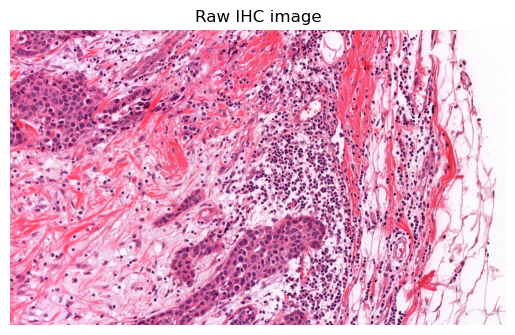

In [122]:
#Inspect imported IHC image
plt.title("Raw IHC image")
plt.axis('off')
plt.imshow(img_ihc)

### Calculate RGB mean of the images

In [123]:
#Start coding here

#Calculate mean of image for each RGB channels. If you use RGB vectors, assign them directly to the variables here
mean_img_stain1 = np.mean(img_eosin, axis=(0, 1))
mean_img_stain2 = np.mean(img_hematoxylin, axis=(0, 1))
mean_img_background = np.mean(img_background, axis=(0, 1))

#End coding here

print(mean_img_stain1)
print(mean_img_stain2)
print(mean_img_background)

[250.25185185  76.92407407 114.75925926]
[73.24444444 17.88888889 83.01111111]
[253.04947653 252.99819881 253.87267815]


### Inspect ROIs of stains and background to ensure correct stain color selection

#fa4c72
#491153
#fdfcfd


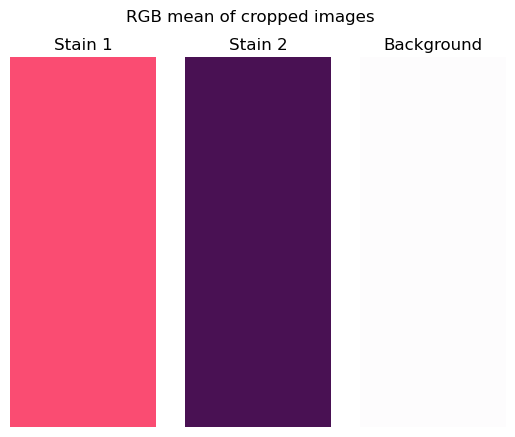

In [124]:
#Convert RGB values to Hex color values for visualization
hex_img_stain1 = '#%02x%02x%02x' % tuple(mean_img_stain1.astype(int))
hex_img_stain2 = '#%02x%02x%02x' % tuple(mean_img_stain2.astype(int))
hex_img_background = '#%02x%02x%02x' % tuple(mean_img_background.astype(int))

print(hex_img_stain1)
print(hex_img_stain2)
print(hex_img_background)

#Visualization of RGB mean of cropped images
fig, axs = plt.subplots(1,3)

fig.suptitle('RGB mean of cropped images')

rectangle_stain1 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain1)
rectangle_stain2 = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_stain2)
rectangle_background = patches.Rectangle((0, 0), 1, 1, facecolor=hex_img_background)

axs[0].add_patch(rectangle_stain1)
axs[1].add_patch(rectangle_stain2)
axs[2].add_patch(rectangle_background)
axs[0].set_title('Stain 1')
axs[1].set_title('Stain 2')
axs[2].set_title('Background')

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')
plt.show()

### __Color Deconvolution__

### Calculate transmittance, T and convert it to absorbances, OD according to Beer–Lambert law  

In [125]:
#Calculate transmittances, T for each stain
T_stain1 = mean_img_background / mean_img_stain1
T_stain2 = mean_img_background / mean_img_stain2
OD_stain1 = -np.log10(T_stain1)
OD_stain2 = -np.log10(T_stain2)

print(OD_stain1)
print(OD_stain2)

[-0.00482814 -0.51705515 -0.34482823]
[-0.53843075 -1.15053406 -0.48547974]


### Normalize the absorbances to vector lengths

In [126]:
#Start coding here

# Normalize the absorbances
OD_stain1_norm = OD_stain1 / np.max(OD_stain1)
OD_stain2_norm = OD_stain2 / np.max(OD_stain2)

#End coding here

print(OD_stain1_norm)
print(OD_stain2_norm)

[  1.         107.09192286  71.42046236]
[1.10906947 2.369891   1.        ]


### Form a deconvolution matrix

In [127]:
#Start coding here

#Combine OD_stain1_norm and OD_stain2_norm to form a normalized OD matrix M
M = np.column_stack((OD_stain1_norm, OD_stain2_norm))

#Calculate the deconvolution matrix according to Linear regression
MT = np.linalg.pinv(M)
MT_M = np.dot(MT, M)
inversed_MT_M = np.linalg.inv(MT_M)
D = np.dot(inversed_MT_M, MT)

#End coding here

print("M")
print(M)
print("M transposed")
print(MT)
print("Inversed M transposed multiplied with M")
print(inversed_MT_M)
print("Deconvolution matrix, D")
print(D)

M
[[  1.           1.10906947]
 [107.09192286   2.369891  ]
 [ 71.42046236   1.        ]]
M transposed
[[-0.01504696  0.00284439  0.00994723]
 [ 0.76713729  0.18373895 -0.28624982]]
Inversed M transposed multiplied with M
[[ 1.00000000e+00 -2.08166817e-17]
 [-1.77635684e-14  1.00000000e+00]]
Deconvolution matrix, D
[[-0.01504696  0.00284439  0.00994723]
 [ 0.76713729  0.18373895 -0.28624982]]


### Calculate the coefficient for each stain 

In [128]:
#Convert pixel intensity to transmittance to absorbance according to Beer-Lambert Law on the IHC image
#Calculate the transmittance
T_img_ihc = mean_img_background / img_ihc


#Because of the logarithmic function in the next step, we assign all transmittance value less than 1 to 1 
T_img_ihc[T_img_ihc<1] = 1

In [129]:
#Start coding here

#Calculate the absorbance
OD_img_ihc = -np.log10(T_img_ihc)

#Coefficient matrix
coeffs = np.dot(np.reshape(OD_img_ihc, (-1, 3)), D.T)
coeff_stain1 = coeffs[:, 0]
coeff_stain2 = coeffs[:, 1]


#Extracting the individual coefficients from the coefficient matrix
#Which are essentially the orthogonal representation of the stains of the IHC image
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

print(coeff_stain1.shape)
print(coeff_stain2.shape)

(8951993,)
(8951993,)


### __Separate stains__

### Multiply the coefficients with the stain absorbance to get the image absorbance per stain

In [130]:
#Initialize the image absorbance container per stain
OD_img_ihc_stain1 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))
OD_img_ihc_stain2 = np.zeros((img_ihc.shape[0], img_ihc.shape[1], img_ihc.shape[2]))


#Start coding here

#Multiply the coefficients with the stain absorbance per stain. Do it independently for each RGB layer
OD_img_ihc_stain1 = np.reshape(coeff_stain1, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain1
OD_img_ihc_stain2 = np.reshape(coeff_stain2, img_ihc_red.shape)[:, :, np.newaxis] * OD_stain2


#End coding here

array([[[0.01610191, 0.03440702, 0.0145184 ],
        [0.01488421, 0.031805  , 0.01342045],
        [0.01083082, 0.02314359, 0.00976568],
        ...,
        [0.00037577, 0.00080295, 0.00033881],
        [0.00228106, 0.00487424, 0.00205674],
        [0.00037577, 0.00080295, 0.00033881]],

       [[0.02888219, 0.06171627, 0.02604182],
        [0.02054658, 0.04390451, 0.01852596],
        [0.01127704, 0.02409709, 0.01016802],
        ...,
        [0.00068441, 0.00146247, 0.0006171 ],
        [0.00164761, 0.00352066, 0.00148558],
        [0.00034069, 0.00072799, 0.00030718]],

       [[0.02967445, 0.0634092 , 0.02675617],
        [0.02064611, 0.0441172 , 0.01861571],
        [0.01265578, 0.02704322, 0.01141117],
        ...,
        [0.00068441, 0.00146247, 0.0006171 ],
        [0.00089239, 0.00190687, 0.00080463],
        [0.00089239, 0.00190687, 0.00080463]],

       ...,

       [[0.00502486, 0.01073726, 0.0045307 ],
        [0.00559369, 0.01195275, 0.00504358],
        [0.00478764, 0

### Convert the image absorbance to image transmittance  

In [131]:
#Convert absorbance to transmittance
T_img_ihc_stain1 = 10 ** (-OD_img_ihc_stain1)
T_img_ihc_stain2 = 10 ** (-OD_img_ihc_stain2)

array([[[0.96360287, 0.92383194, 0.96712275],
        [0.96630848, 0.9293836 , 0.96957086],
        [0.97536953, 0.94810493, 0.97776463],
        ...,
        [0.99913514, 0.99815286, 0.99922016],
        [0.99476143, 0.98883939, 0.99527539],
        [0.99913514, 0.99815286, 0.99922016]],

       [[0.93565946, 0.86752846, 0.94179891],
        [0.95379144, 0.90384817, 0.95823943],
        [0.97436789, 0.94602565, 0.97685923],
        ...,
        [0.99842533, 0.99663821, 0.99858008],
        [0.99621342, 0.99192615, 0.99658517],
        [0.99921584, 0.99832514, 0.99929293]],

       [[0.93395415, 0.86415332, 0.94025107],
        [0.95357287, 0.90340565, 0.95804144],
        [0.9712795 , 0.93962979, 0.97406701],
        ...,
        [0.99842533, 0.99663821, 0.99858008],
        [0.99794732, 0.99561888, 0.998149  ],
        [0.99794732, 0.99561888, 0.998149  ]],

       ...,

       [[0.98849651, 0.97557967, 0.98962191],
        [0.98720265, 0.97285307, 0.98845389],
        [0.98903659, 0

### Clip each layer in the image transmittance to values between 0 and 1, preparing for conversion to values between 0 and 255 later

In [132]:
#Clip each layer to 0,1
T_img_ihc_stain1[T_img_ihc_stain1 > 1] = 1
T_img_ihc_stain2[T_img_ihc_stain2 > 1] = 1
T_img_ihc_stain1[T_img_ihc_stain1 < 0] = 0
T_img_ihc_stain2[T_img_ihc_stain2 < 0] = 0

### Convert the image transmittance to values between 0 and 255 (integers), so that plotting is possible

In [133]:
#Start coding here

T_img_ihc_stain1_norm = (T_img_ihc_stain1 * 255).astype(np.uint8)

T_img_ihc_stain2_norm = (T_img_ihc_stain2 * 255).astype(np.uint8)

#End coding here


array([[[245, 235, 246],
        [246, 236, 247],
        [248, 241, 249],
        ...,
        [254, 254, 254],
        [253, 252, 253],
        [254, 254, 254]],

       [[238, 221, 240],
        [243, 230, 244],
        [248, 241, 249],
        ...,
        [254, 254, 254],
        [254, 252, 254],
        [254, 254, 254]],

       [[238, 220, 239],
        [243, 230, 244],
        [247, 239, 248],
        ...,
        [254, 254, 254],
        [254, 253, 254],
        [254, 253, 254]],

       ...,

       [[252, 248, 252],
        [251, 248, 252],
        [252, 249, 252],
        ...,
        [252, 250, 253],
        [251, 248, 252],
        [254, 253, 254]],

       [[251, 248, 252],
        [251, 246, 251],
        [251, 247, 251],
        ...,
        [253, 251, 253],
        [252, 250, 253],
        [253, 251, 253]],

       [[251, 247, 251],
        [251, 246, 251],
        [250, 245, 251],
        ...,
        [253, 251, 253],
        [253, 252, 253],
        [254, 253, 254]]

### Visualize deconvolved images

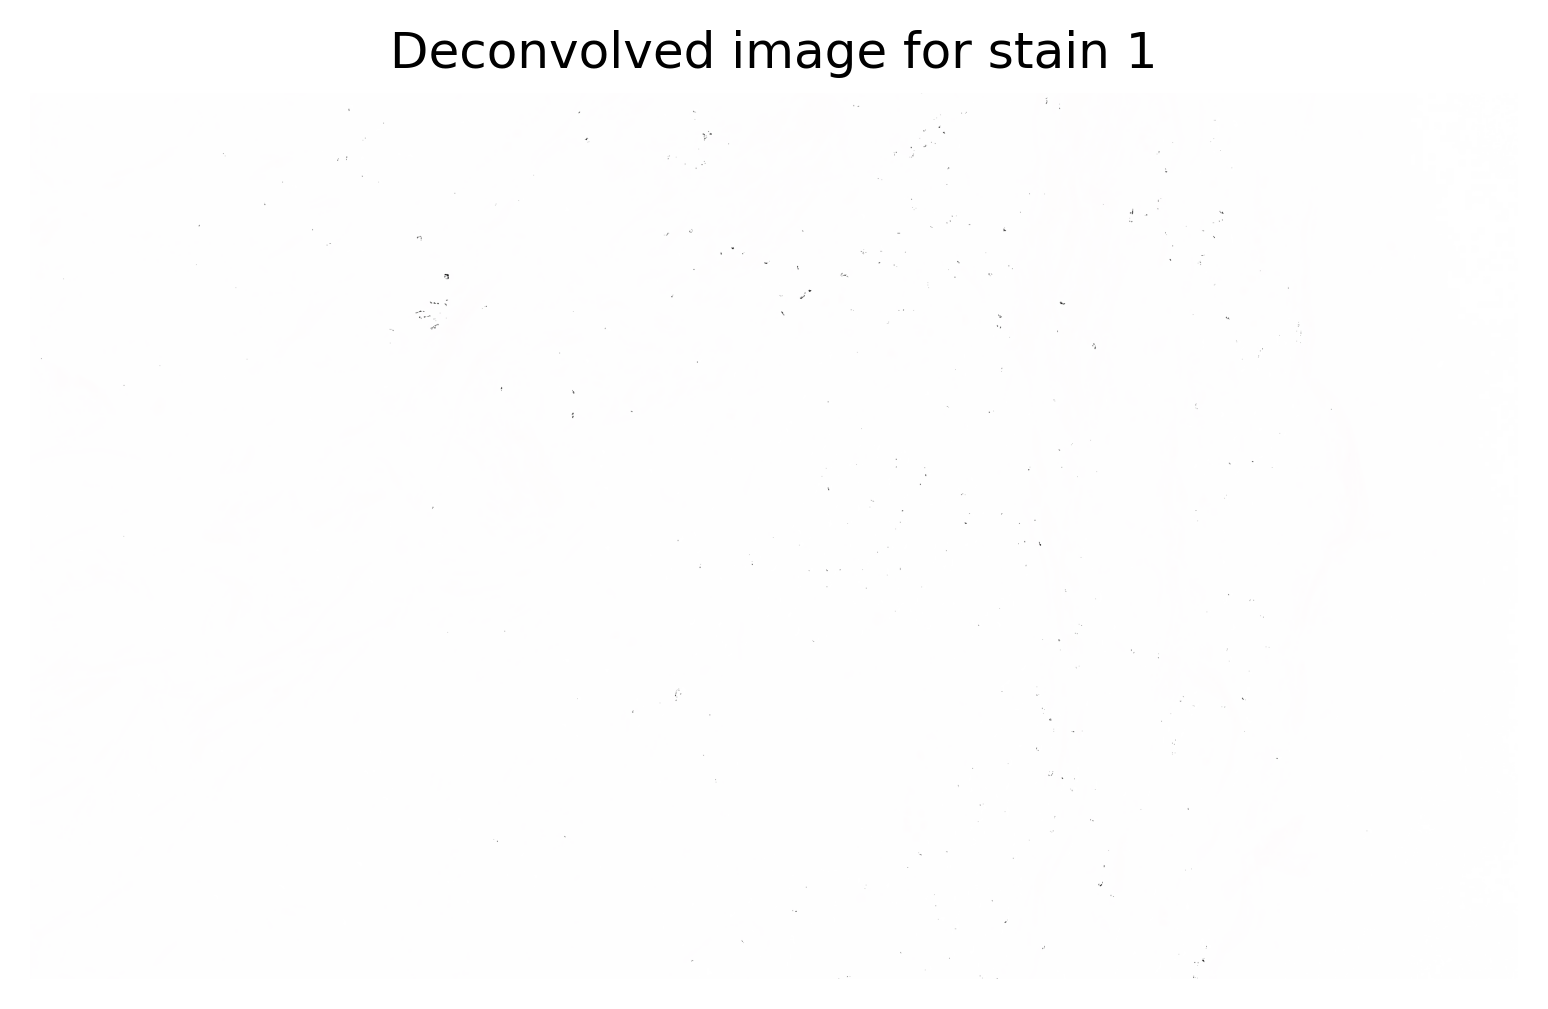

In [134]:
#Display deconvolved image for stain 1
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 1")
plt.axis('off')
plt.imshow(T_img_ihc_stain1_norm)
fig.savefig('T_img_ihc_stain1_norm.tif')

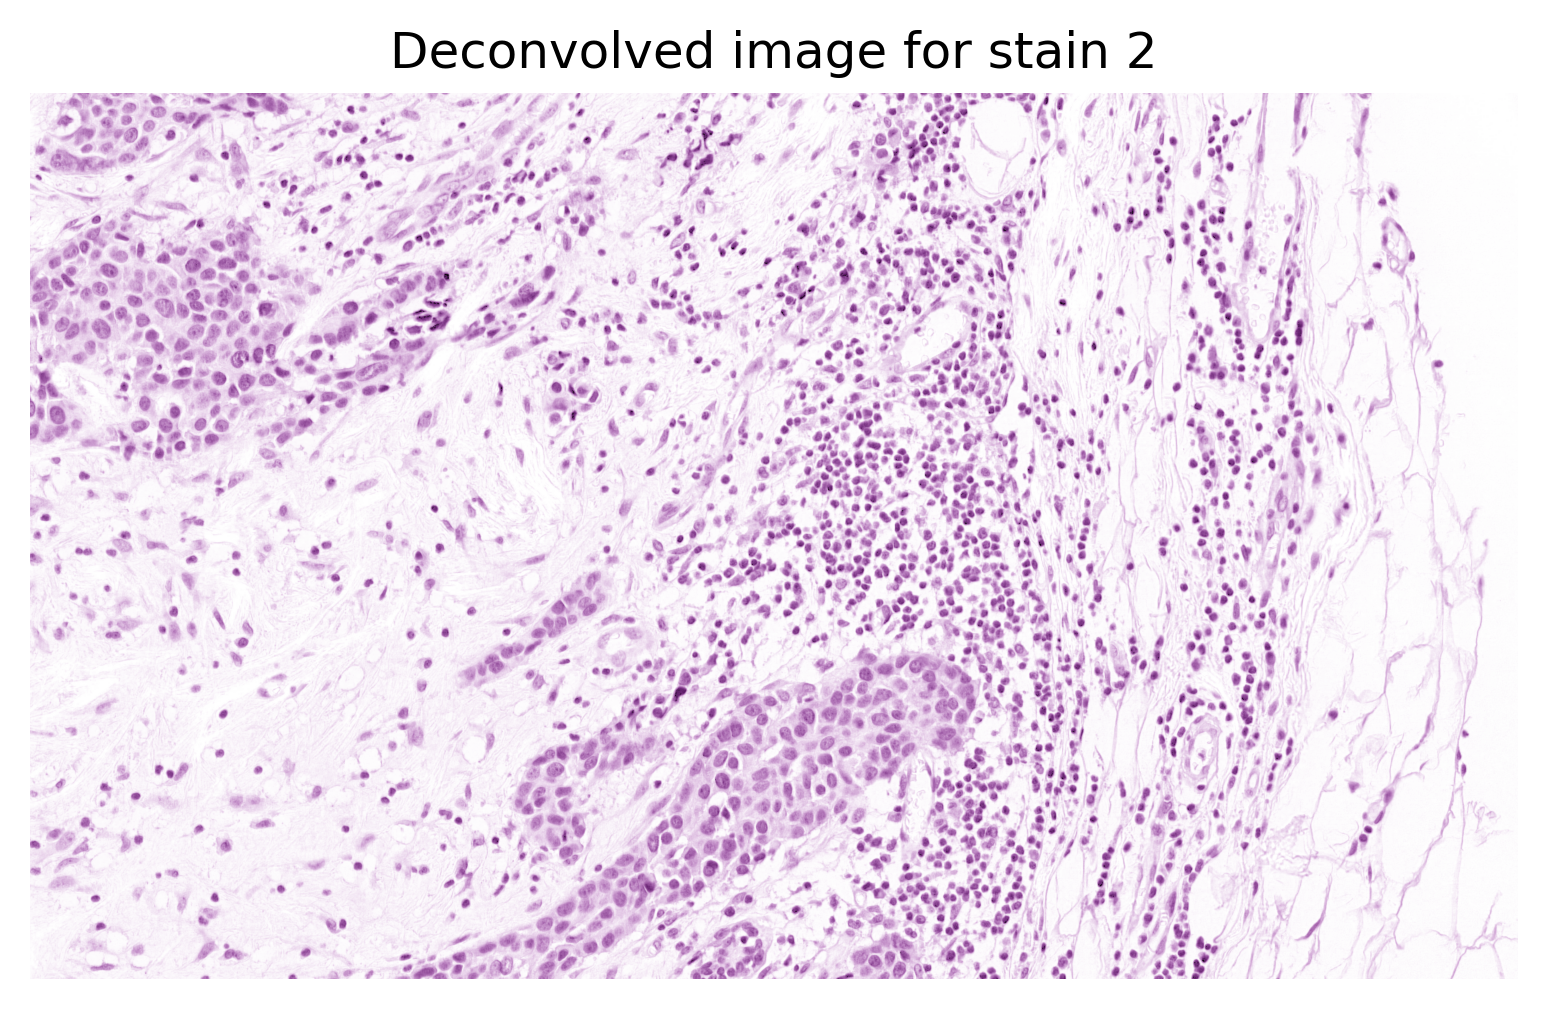

In [135]:
#Display and export deconvolved image for stain 2
fig = plt.figure(dpi=300)
plt.title("Deconvolved image for stain 2")
plt.axis('off')
plt.imshow(T_img_ihc_stain2_norm)
fig.savefig('T_img_ihc_stain2_norm.tif')

In [136]:
print("Coefficients for stain 1:", coeff_stain1)
print("Coefficients for stain 2:", coeff_stain2)

Coefficients for stain 1: [-3.63757841e-03 -3.46833130e-03 -3.28692017e-03 ...  5.95510550e-05
  3.84150684e-05  1.73630431e-05]
Coefficients for stain 2: [-0.02990526 -0.02764368 -0.02011552 ... -0.00531043 -0.00366061
 -0.00201735]
